In [285]:
import pandas as pd
import seaborn as sns


df = pd.read_csv('cardio_train.csv' ,sep=';' , index_col=0)

df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [286]:
import matplotlib.pyplot as plt

In [287]:
df.shape

(70000, 12)

In [288]:
columns = df.columns
columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [290]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [291]:
df.dtypes

age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [292]:
df.isnull().sum()
df.isnull().sum().sum()

np.int64(0)

In [293]:
df.duplicated().sum()

np.int64(24)

In [294]:
df.drop_duplicates(inplace=True)

In [295]:
print(df['age'].dtype)
df['age'].head(5)

int64


id
0    18393
1    20228
2    18857
3    17623
4    17474
Name: age, dtype: int64

In [296]:
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)


In [297]:
# age days to year
# df2 = pd.read_csv('cardio_train.csv' , sep=';')
# df['age'] = df2['age']
df['age'] = (df['age']/365).astype(int)
df['age'].head(5)



id
0    50
1    55
2    51
3    48
4    47
Name: age, dtype: int64

In [298]:
# df.drop('age_year' , axis=1 , inplace=True)
df.head(2)
df['cardio'].value_counts()

cardio
0    35004
1    34972
Name: count, dtype: int64

[]

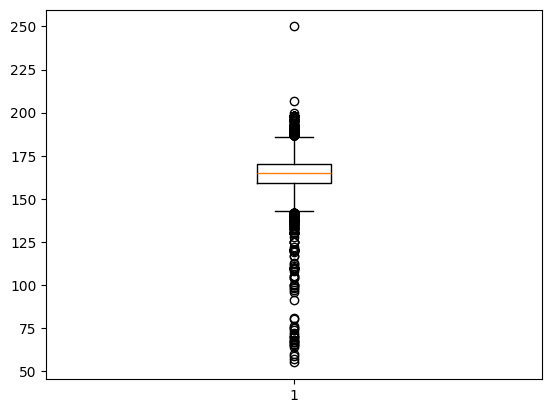

In [299]:
plt.boxplot(df['height'])
plt.plot()

In [300]:
q1 = df['height'].quantile(0.25)
q3 = df['height'].quantile(0.75)

iqr = q3-q1
lower = q1 - 1.5*(iqr)
upper = q3 + 1.5*(iqr)
print(lower , "  " ,upper)
df = df[(df['height']>=lower) & (df['height']<=upper)]


142.5    186.5


In [301]:
df = df[(df['ap_hi']>=90) & (df['ap_lo']<=180)]

# q1 = df['ap_hi'].quantile(0.25)
# q3 = df['ap_hi'].quantile(0.75)

# iqr = q3-q1
# lower = q1 - 1.5*(iqr)
# upper = q3 + 1.5*(iqr)
# print(lower , "  " ,upper)
# df = df[(df['ap_hi']>=lower) & (df['ap_hi']<=upper)]
df.shape

(68198, 13)

In [302]:
df = df[(df['ap_lo'] >= 60) & (df['ap_lo'] <= 120)]
# q1 = df['ap_lo'].quantile(0.25)
# q3 = df['ap_lo'].quantile(0.75)

# iqr = q3-q1
# lower = q1 - 1.5*(iqr)
# upper = q3 + 1.5*(iqr)
# print(lower , "  " ,upper)
# df = df[(df['ap_lo']>=lower) & (df['ap_lo']<=upper)]
df.shape

(67963, 13)

In [303]:
df['height'].min()

np.int64(143)

[]

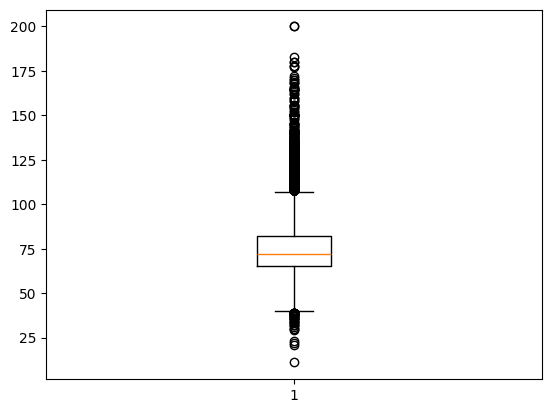

In [304]:
plt.boxplot(df['weight'])
plt.plot()

In [305]:
q1 = df['weight'].quantile(0.25)
q3 = df['weight'].quantile(0.75)

iqr = q3-q1
lower = q1 - 1.5*(iqr)
upper = q3 + 1.5*(iqr)
print(lower , "  " ,upper)
df = df[(df['weight']>=lower) & (df['weight']<=upper)]
df.shape

39.5    107.5


(66285, 13)

In [306]:
df['gluc'].value_counts()

gluc
1    56607
3     4940
2     4738
Name: count, dtype: int64

In [307]:
df = pd.get_dummies(df ,columns=[ 'cholesterol', 'gluc'] , drop_first=True)
df.head(5)


,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,BMI,cholesterol_2,cholesterol_3,gluc_2,gluc_3
id,,,,,,,,,,,,,,,
0,50,2,168,62.0,110,80,0,0,1,0,21.967120,False,False,False,False
1,55,1,156,85.0,140,90,0,0,1,1,34.927679,False,True,False,False
2,51,1,165,64.0,130,70,0,0,0,1,23.507805,False,True,False,False
3,48,2,169,82.0,150,100,0,0,1,1,28.710479,False,False,False,False
4,47,1,156,56.0,100,60,0,0,0,0,23.011177,False,False,False,False


In [308]:
print(df['BMI'].min())
print(df['BMI'].max())

13.520822065981614
50.89179548156956


In [309]:
df.shape

(66285, 15)

<Axes: xlabel='cardio', ylabel='count'>

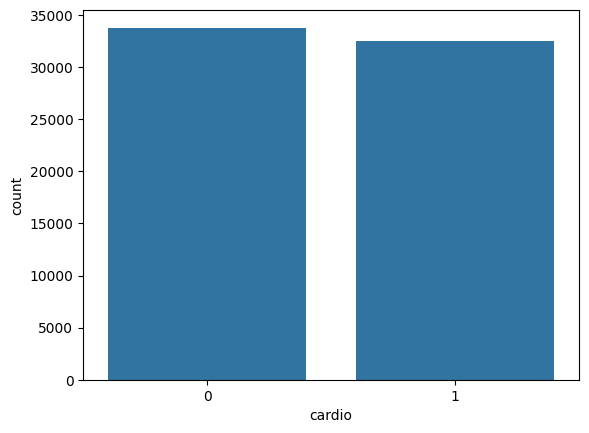

In [310]:
sns.countplot(data=df , x='cardio')

In [311]:
df[df['cardio']==1].count()
df.shape

(66285, 15)

In [312]:
corr = df.corr(numeric_only=True)


<Axes: xlabel='cardio', ylabel='weight'>

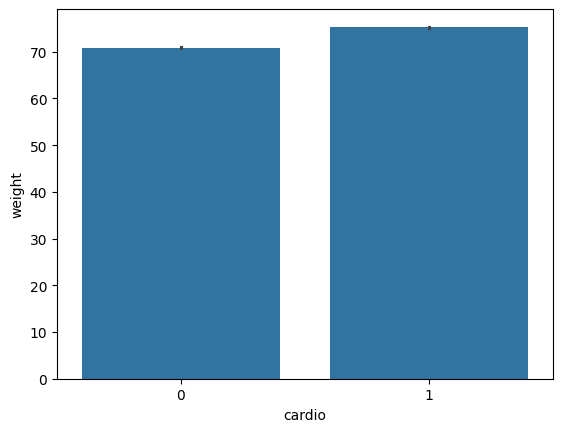

In [313]:
sns.barplot(x=df['cardio'] , y=df['weight'])


## Normlization

In [314]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[['age' , 'height' , 'weight' , 'ap_hi' , 'ap_lo' , 'BMI']] = scaler.fit_transform(df[['age' , 'height' , 'weight' , 'ap_hi' , 'ap_lo' , 'BMI']])

df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,BMI,cholesterol_2,cholesterol_3,gluc_2,gluc_3
id,,,,,,,,,,,,,,,
0,-0.418057,2,0.487157,-0.890540,-0.117825,-0.131398,0,0,1,0,-1.113855,False,False,False,False
1,0.320518,1,-1.101748,0.968748,0.072243,0.958294,0,0,1,1,1.707006,False,True,False,False
2,-0.270342,1,0.089930,-0.728863,0.008887,-1.221089,0,0,0,1,-0.778525,False,True,False,False
3,-0.713487,2,0.619566,0.726232,0.135598,2.047985,0,0,1,1,0.353835,False,False,False,False
4,-0.861201,1,-1.101748,-1.375572,-0.181180,-2.310780,0,0,0,0,-0.886616,False,False,False,False


In [315]:
# df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']


print(df.shape)
# df.to_csv('Eda.csv')

(66285, 15)
